In [14]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [23]:
x_train =np.linspace(-1,1,20)


In [15]:
y_train = np.array([-0.6561 , -0.30990, -0.59035 , -0.50855 , -0.285 ,
                    -0.2443 , -0.02445 , 0.00135 , -.2006 , 0.07475 ,
                   -0.1422 , 0.06515 , 0.152665 , 0.3521 , 0.28415,
                   0.5524 , 0.23115 , 0.20835 , 0.4211 , 0.60485
                   ])

In [17]:
x_test = np.linspace(-1 ,1 ,20)

In [18]:
y_test = np.array([-0.69415 , -0.451 , -0.43002 , -0.4484 , -0.1475 ,
                  -0.5019 , -0.28055 , 0.24595 , -0.21425 , -0.0286,
                  0.23415 , 0.46575 , 0.07955 , 0.1973 , 0.0719 , 
                  0.3639 , 0.5536 , 0.3365 , 0.50705 , 0.33435])

In [24]:
print(x_train.shape, '\n' , y_train.shape , '\n' , x_test.shape , '\n' , y_test.shape)

(20,) 
 (20,) 
 (20,) 
 (20,)


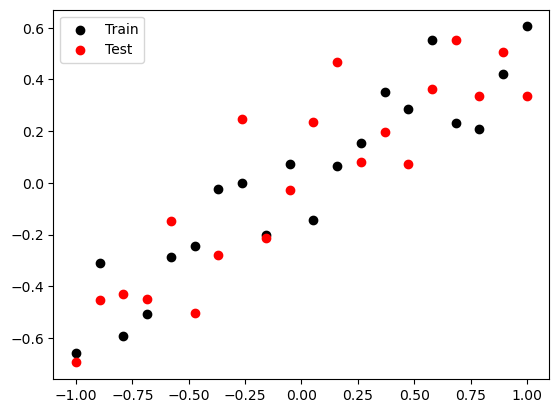

In [25]:
plt.scatter(x_train,y_train , c='black',label = 'Train')
plt.scatter(x_test,y_test , c='red',label = 'Test')
plt.legend()
plt.show()

Regression Model 

In [26]:
model = Sequential()
model.add(Dense(128 , input_dim=1 , activation= 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation='linear'))
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse' , optimizer = adam , metrics = ['mse'])
history = model.fit(x_train,y_train,epochs =500 , validation_data =(x_test,y_test),verbose =0)

In [29]:
# evaluate The Model 
train_mse = model.evaluate(x_train,y_train,verbose =0)
test_mse = model.evaluate(x_test,y_test,verbose=0)
print('Train: {},test:{}' .format(train_mse , test_mse))


Train: [0.004644675645977259, 0.004644675645977259],test:[0.04725201055407524, 0.04725201055407524]


In [30]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 211ms/step


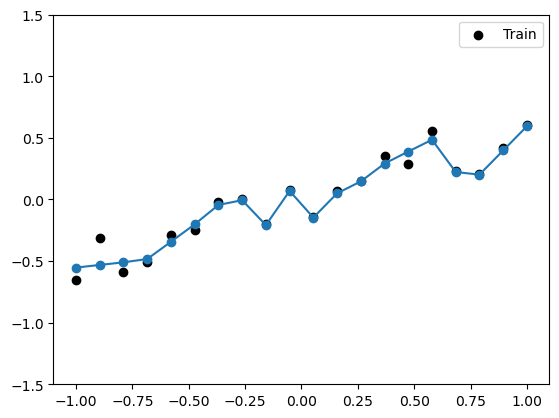

In [32]:
plt.figure()
plt.scatter(x_train,y_train , c ='black' , label = 'Train')
plt.scatter(x_test,y_pred)
plt.plot(x_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

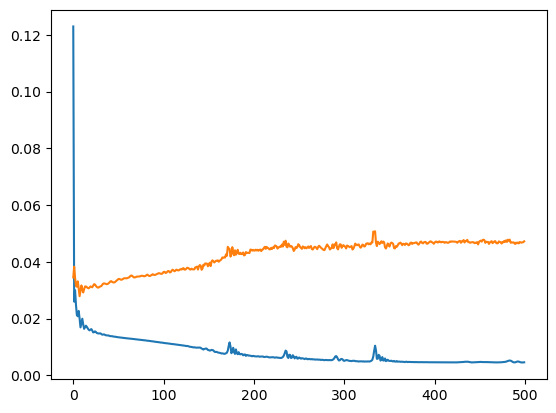

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


# Dropout Model

In [35]:
model = Sequential()
model.add(Dense(128,input_dim = 1,activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation ='linear'))

adam =Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer =adam,metrics=['mse'])

history = model.fit(x_train,y_train,epochs =500 , validation_data = (x_test,y_test),verbose=False)

In [38]:
# evaluate Model
train_mse = model.evaluate(x_train,y_train,verbose=0)
test_mse = model.evaluate(x_test,y_test,verbose =0 )
print( "Train: {}, Test: {}".format(train_mse,test_mse))

Train: [0.011201543733477592, 0.011201543733477592], Test: [0.04050230607390404, 0.04050230607390404]


In [39]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 188ms/step


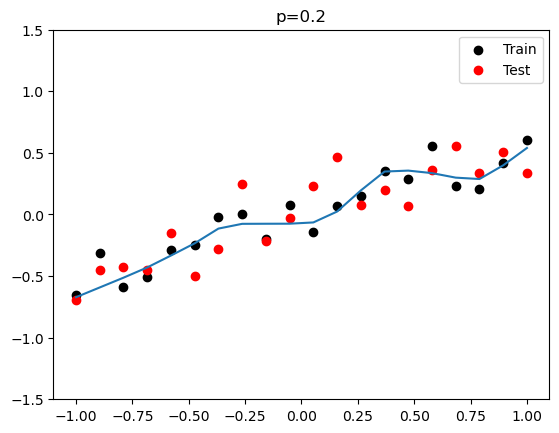

In [41]:
plt.figure()
plt.title("p=0.2")
plt.scatter(x_train,y_train ,c='black',label = 'Train')
plt.scatter(x_test,y_test ,c='red',label = 'Test')
plt.plot(x_test,y_pred)
plt.legend()
plt.legend()
plt.ylim((-1.5 ,1.5))
plt.show()